# Centralities: who's the most important?

<div style="display: flex; align-items: center;">
    <a target="_blank" href="https://colab.research.google.com/github/yy/netsci-course/blob/master/docs/m06-centrality/lab06.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" style="vertical-align: -8px; margin-right: 10px;" />
        Open this notebook in Google Colab
    </a>
</div>


<div style="display: flex; align-items: center;">
    <a href="https://raw.githubusercontent.com/yy/netsci-course/master/docs/m06-centrality/lab06.ipynb" download>
        <img src="http://yyahn.com/netsci-course/images/download_icon.png" style="vertical-align: -8px; margin-right: 10px;" />
        Download this notebook (File -> Save As)
    </a>
</div>

For this assignment we will be exploring several centralities to get an intuitive sense of what the various centrality metrics tell us about the nodes in the graph. 

## Degree centrality and Eigenvector centrality

Before messing with data, let's think about the two foundational centralities: degree centrality and eigenvector centrality.

Degree centrality is simply defined as the number of edges connected to a node. If you imagine a social network where each node (person) can influence others, then the degree centrality captures the idea of how _directly_ influential a person would be. This may be a good first approximation. If someone is connected to so many people (e.g., those with many followers on a social media platform), then it is likely that the person is influential.

Still, this assumes that all connections (followers) are more or less equal. But in reality, some followers may be more influential than others. For instance, imagine a guru followed by hugely influential politicians and celebrities. Even if the guru may not be directly connected to many people, the guru's influence can be huge.

This is where the eigenvector centrality comes in. The idea is an extension of the degree centrality. Instead of defining the centrality of a node as its degree, eigenvector centrality defines the centrality of a node as the sum of eigenvector centrality of the neighbors. In other words, an important node is not just a node with many neighbors, but the one with many _important_ neighbors. We can think about repeating the following process:

$$ x^{t+1}_i = \frac{1}{\lambda} \sum_{j=1}^{n} A_{ij} x^{t}_j $$

where $A$ is the adjacency matrix of the graph, $x$ is the eigenvector centrality vector, and $\lambda$ is a normalization constant. It turns out, as you have learned, mathematically this idea can be translated into finding the _eigenvector_ of the adjacency matrix that corresponds to the largest (and positive) eigenvalue. 

$$ \mathbf{A} \mathbf{x} = \lambda \mathbf{x} $$

**Here is a question: consider an undirected $k$-regular graph with only one connected component. That means that everyone can be reached from everyone else and every node's degree is $k$. What would be the eigenvector centrality vector of this graph?**

<pre>
# YOUR SOLUTION HERE
</pre>

## Find the most important dolphin!

We will be using the [Dolphin social network](http://www-personal.umich.edu/~mejn/netdata/dolphins.zip). (You may need to copy the link address into a new tab/window to trigger the download.) Download the graph and load it as a networkx graph.

In [5]:
import networkx as nx
dolphin_social_network = nx.read_gml('dolphins.gml')

# number of nodes, edges, and average degree
num_nodes = len(dolphin_social_network.nodes())
num_edges = len(dolphin_social_network.edges())
avg_degree = num_edges / num_nodes
print('Number of nodes:', num_nodes)
print('Number of edges:', num_edges)
print('Average degree:', avg_degree)

Number of nodes: 62
Number of edges: 159
Average degree: 2.564516129032258


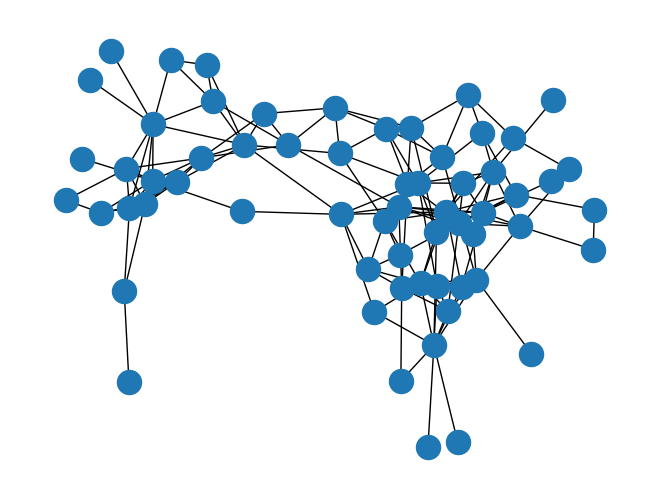

In [6]:
nx.draw(dolphin_social_network)

## Centrality in Networkx
Networkx has several functions available for calculating the centralities of the nodes in the graph. There are functions for [eigenvector](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html?highlight=eigenvector#networkx.algorithms.centrality.eigenvector_centrality), [katz](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.katz_centrality.html#networkx.algorithms.centrality.katz_centrality), [closeness](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality), [betweenness](https://networkx.org/documentation/stable/reference/algorithms/centrality.html#shortest-path-betweenness), [degree](https://networkx.org/documentation/stable/reference/algorithms/centrality.html#degree), etc. For a full list you can visit the [documentation page](https://networkx.org/documentation/stable/reference/algorithms/centrality.html#module-networkx.algorithms.centrality). 

These functions take a graph as an argument and return a dictionary with nodes as keys and the centrality as values. This is convenient for us because we can set these as attributes for the nodes in the graph using the [`set_node_attributes`](https://networkx.org/documentation/stable/reference/generated/networkx.classes.function.set_node_attributes.html?highlight=set%20node%20attributes#networkx-classes-function-set-node-attributes) function. For example:

In [7]:
import networkx as nx

my_graph = nx.erdos_renyi_graph(500, 0.3)

# Get the eigenvector centralities for all the nodes
centralities = nx.eigenvector_centrality(my_graph)

# Set the attributes of the nodes to include the centralities
# The arguments are: <graph> <attribute key> <values>
# Where <values> is a dictionary with keys=nodes
nx.set_node_attributes(my_graph, centralities, "eigenvector")

# Now we can refer to the node's attributes in the graph
print(my_graph.nodes[3]["eigenvector"])

0.04926750308526889


We want to do this so that we can export our graph as a `gexf` file using networkx's [write_gexf](https://networkx.org/documentation/stable/reference/readwrite/generated/networkx.readwrite.gexf.write_gexf.html?highlight=write_gexf#networkx.readwrite.gexf.write_gexf) function. Gexf is able to contain a lot more information than other graph datatypes like pajek. It can contain information about the node attributes or edge attributes that belong to the graph and then these attributes will be recognized by Gephi for plotting.

Alternatively, if you use Cytoscape, you can export the centralities as a node property file, which is just a CSV contains the node IDs as the first column, and centralities as the other columns. Cytoscape can read CSV files through "important data tables" functionality: https://manual.cytoscape.org/en/stable/Node_and_Edge_Column_Data.html

Once the graph is saved and you open it in Gephi or cytoscape, you can use the node (or edge) attributes to control node (or edge) size and color. 

You can then arrange your nodes accordingly and then save separate visualizations that only change the node color/size according to your saved attributes. You will be using this ability for the following questions.

**What to submit**: Turn in a PDF that contains your short responses and the visualizations for each of the following questions. **Keep the node location the same** for your graph visualizations.

## Picking the right Dolphins
Answer the following questions:

#### (1) Popularity contest
We want to know who the top dolphins are in the network, the real centers of attraction. Using what you learned about centrality from the readings and videos, choose an appropriate centrality measure that will tell us who those dolphins are. Justify your decision and list who the important dolphins are.

#### (2) Relay
Dolphins like passing information around efficiently along the shortest-paths. Among their neighbors who are the most important message relayers in the network? Justify your centrality choice for finding these dolphins.

#### (3) Gossip 
There is a lot smack going around the pod and everyone wants to know if Flipper will be inviting them to the party next week. But gossip takes time travel. Which dolphins are in the best position for getting all the best gossip from around the pod? Justify your centrality choice for finding these dolphins.

In [ ]:
# YOUR SOLUTION HERE

In [ ]:
nx.write_gexf(dolphin_social_network, "dolphin_centrality.gexf")